In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
movies_df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Display first few rows of the dataset
print(movies_df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [3]:
print(movies_df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [4]:
# Check for missing values
print(movies_df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [5]:
# Check data types
print(movies_df.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [6]:
# Clean 'Year' column by removing non-numeric characters
movies_df['Year'] = movies_df['Year'].astype(str).str.extract('(\d{4})').astype(float)

# Clean 'Votes' column by removing commas, dollar signs, and 'M'
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').astype(float)

# Clean 'Duration' column by removing 'min' suffix and converting to numeric
movies_df['Duration'] = movies_df['Duration'].str.replace(' min', '').astype(float)

In [7]:
# Handle missing values: Drop rows with missing 'Duration'
movies_df.dropna(subset=['Duration'], inplace=True)

In [8]:
# Fill missing values in other columns with a placeholder or appropriate value
movies_df['Year'].fillna(movies_df['Year'].median(), inplace=True)
movies_df['Votes'].fillna(movies_df['Votes'].median(), inplace=True)
movies_df['Rating'].fillna(movies_df['Rating'].median(), inplace=True)
movies_df['Genre'].fillna('Unknown', inplace=True)
movies_df['Director'].fillna('Unknown', inplace=True)
movies_df['Actor 1'].fillna('Unknown', inplace=True)
movies_df['Actor 2'].fillna('Unknown', inplace=True)
movies_df['Actor 3'].fillna('Unknown', inplace=True)

In [9]:
# Convert 'Year' and 'Votes' to numeric types
movies_df['Year'] = movies_df['Year'].astype(float)
movies_df['Votes'] = movies_df['Votes'].astype(float)

In [10]:
# Confirm data types are handled
print(movies_df.dtypes)

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [11]:
# Confirm missing values are handled
print(movies_df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


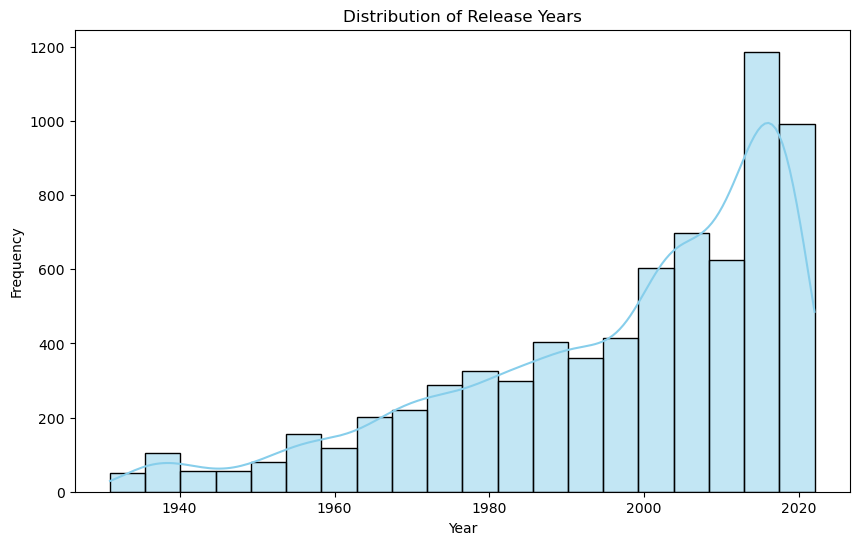

In [12]:
# Distribution of Release Years
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

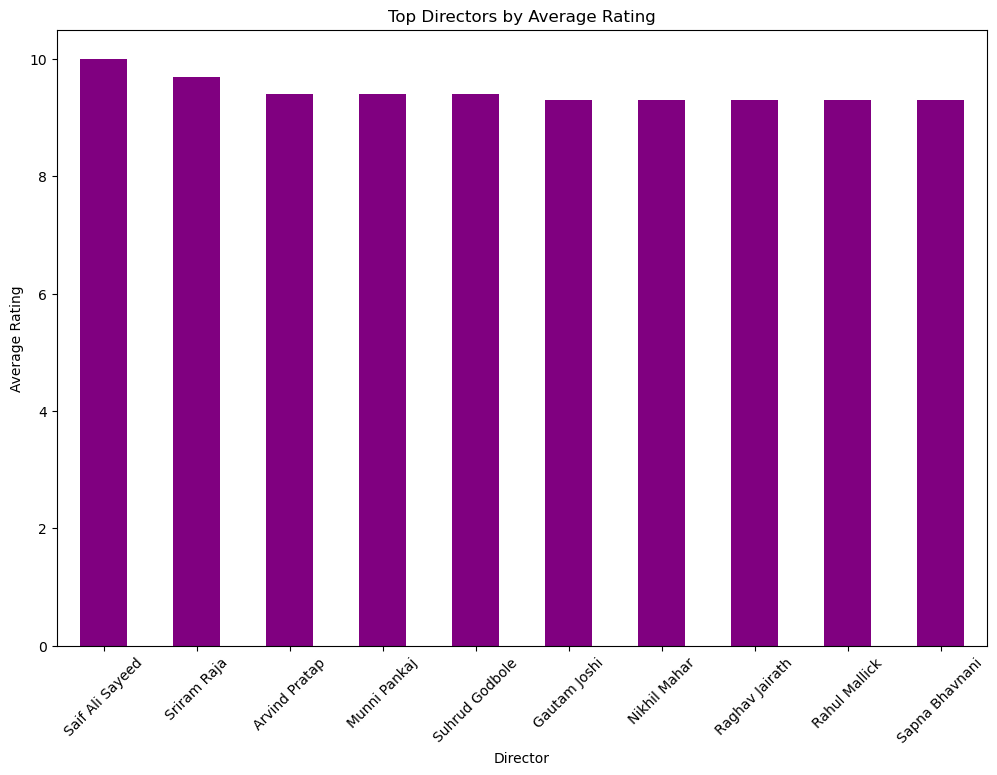

In [13]:
# Top Directors by Average Rating
top_directors = movies_df.groupby('Director')['Rating'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar', color='purple')
plt.title('Top Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

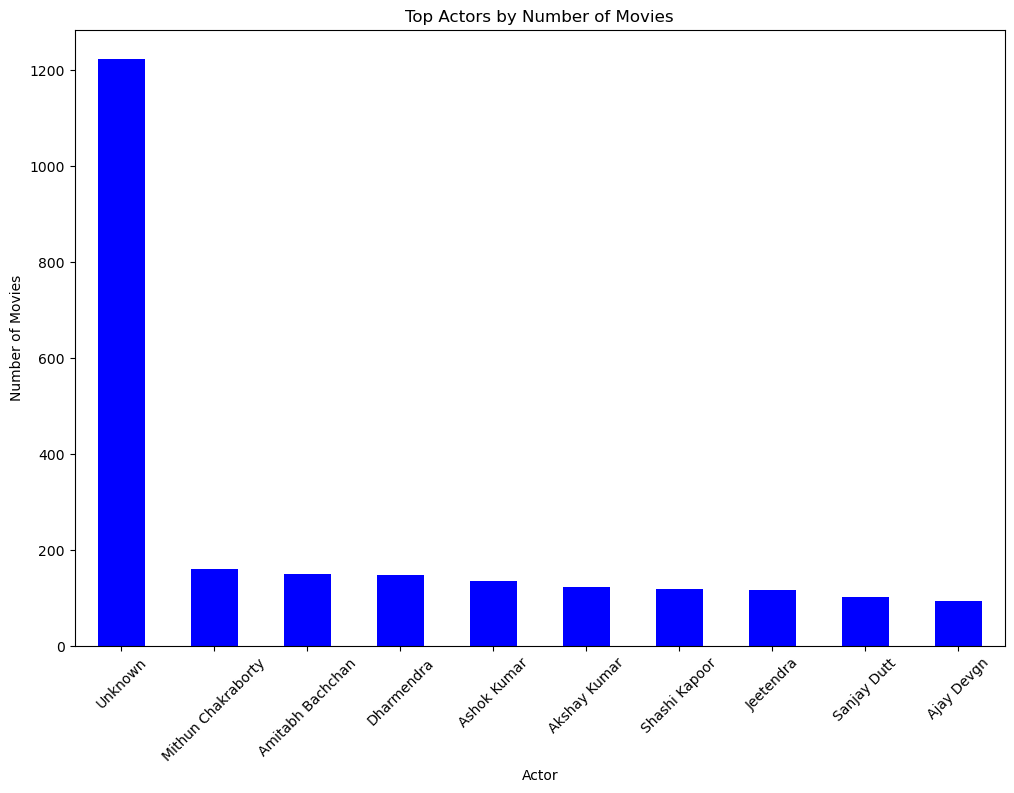

In [14]:
# Top Actors by Number of Movies
top_actors = pd.concat([movies_df['Actor 1'], movies_df['Actor 2'], movies_df['Actor 3']]).value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
top_actors.plot(kind='bar', color='blue')
plt.title('Top Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


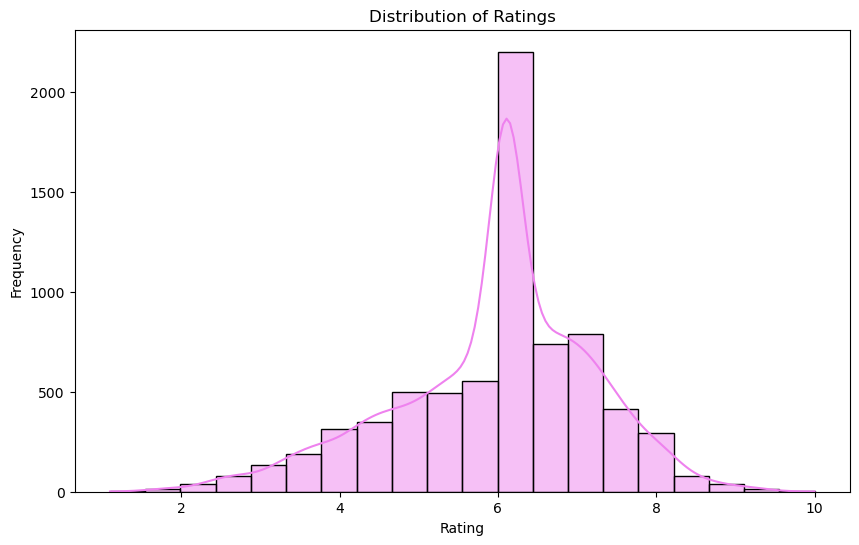

In [15]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Rating'], bins=20, kde=True, color='violet')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Feature Engineering
movies_df = pd.get_dummies(movies_df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [17]:
# Model Selection
X = movies_df.drop(['Rating', 'Name'], axis=1)
y = movies_df['Rating']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Year,Duration,Votes,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy",...,Actor 3_Zayed Khan,Actor 3_Zeb Rehman,Actor 3_Zeba Rizvi,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zulfi Sayed
13501,1971.0,180.0,31.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13355,2012.0,141.0,9060.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3174,1989.0,165.0,126.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14569,2021.0,83.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5079,1997.0,120.0,27.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,1955.0,150.0,16.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11103,1968.0,155.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11181,1982.0,137.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11618,2004.0,162.0,608.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
y_train

13501    6.5
13355    4.0
3174     2.3
14569    6.1
5079     5.4
        ... 
7914     6.5
11103    6.1
11181    6.1
11618    3.7
1792     3.2
Name: Rating, Length: 5792, dtype: float64

In [21]:
# Initialize the Linear Regression model
model = LinearRegression()

In [22]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.429260159790962


In [24]:
# Display coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-5.07503654e-02  9.23595745e-03  6.61340060e-05 ...  2.41923666e-01
 -1.67344240e-01 -1.96456016e+00]
Intercept: 106.23867463092189


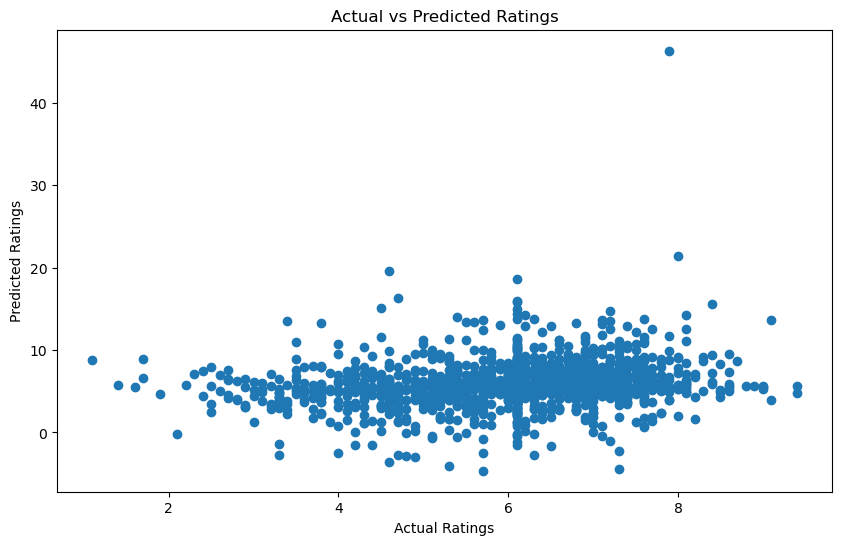

In [25]:
# Visualize actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

In [26]:
# Predictions for new data
new_data = X_test.copy()  
new_predictions = model.predict(new_data)

# Display the predicted ratings for the new movies
print("Predicted Ratings:", new_predictions)

Predicted Ratings: [8.94396609 1.91323578 4.85172914 ... 5.22527692 4.87014541 7.86650546]
